**สมาชิก**

B6512057 นายธีรเดช หอมหวาน

ฺB6525163 นายพูลทรัพย์ นานาวัน

Dataset: https://www.kaggle.com/datasets/ashishpandey2062/next-word-predictor-text-generator-dataset

เป็นไฟล์ที่ใช้เก็บข้อมูลที่ครอบคลุมเนื้อหาหลายด้าน เช่น วิทยาศาสตร์ คณิตศาสตร์ ประวัติศาสตร์ หรืออื่นๆ ในรูปแบบข้อความธรรมดา (Plain Text) ซึ่งไม่มีการจัดรูปแบบพิเศษ

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
with open("dataset-rnn/next_word_predictor.txt","r",encoding="utf-8") as file:
    data = file.read()

In [ ]:
def separate_punc(data):#แยกคำออกจากกันโดยแบ่งจากช่องว่าง และตัดพวกเครื่องหมายออก

    return [token.lower() for token in data.split(" ") if token not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])#ทำคลังคำศัพ

In [ ]:
len(tokenizer.word_index)

4993

In [ ]:
input_sequences =[]
for sentence in data.split('.'):
  tokenized_sentence=tokenizer.texts_to_sequences([sentence])[0]#แปลงประโยคที่ได้มาใส่เป็นลำดับใน คลัง

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])

In [ ]:
len(input_sequences)


25878

In [ ]:
max_len = max([len(x) for x in input_sequences])#ประโยคที่ยาวที่สุด
max_len

84

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences=pad_sequences(input_sequences,maxlen=max_len,padding='pre') # เติม o ไปด้านหน้าเพื่อให้ column เท่ากัน

In [ ]:
x = padded_input_sequences[:,:-1] # ได้feature

In [ ]:
y=padded_input_sequences[:,-1]#ได้ label

In [ ]:
len(tokenizer.word_index)+1

4994

In [ ]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y,num_classes=4994)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [ ]:
model=Sequential()
model.add(Embedding(4994,100))
model.add(LSTM(150))
model.add(Dense(4994,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
647/647 [==============================] - 16s 18ms/step - loss: 7.1441 - accuracy: 0.0545 - val_loss: 6.9457 - val_accuracy: 0.0634
Epoch 2/30
647/647 [==============================] - 9s 14ms/step - loss: 6.5218 - accuracy: 0.0710 - val_loss: 6.8442 - val_accuracy: 0.0746
Epoch 3/30
647/647 [==============================] - 9s 13ms/step - loss: 6.1386 - accuracy: 0.0859 - val_loss: 6.7817 - val_accuracy: 0.0866
Epoch 4/30
647/647 [==============================] - 9s 14ms/step - loss: 5.7888 - accuracy: 0.1043 - val_loss: 6.7840 - val_accuracy: 0.0927
Epoch 5/30
647/647 [==============================] - 9s 14ms/step - loss: 5.4382 - accuracy: 0.1213 - val_loss: 6.8023 - val_accuracy: 0.1059
Epoch 6/30
647/647 [==============================] - 10s 15ms/step - loss: 5.0965 - accuracy: 0.1388 - val_loss: 6.8668 - val_accuracy: 0.1080
Epoch 7/30
647/647 [==============================] - 10s 15ms/step - loss: 4.7604 - accuracy: 0.1577 - val_loss: 6.9552 - val_accuracy: 0.1

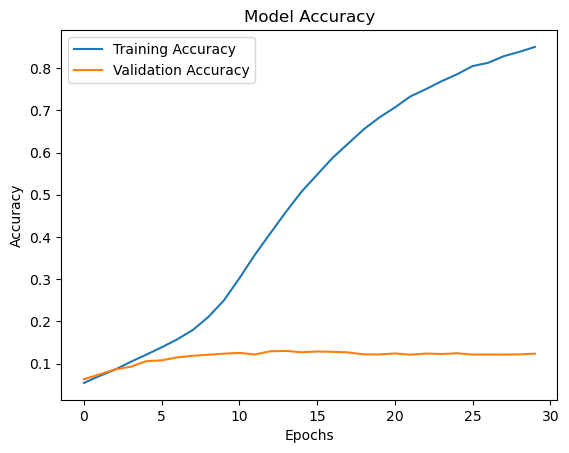

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

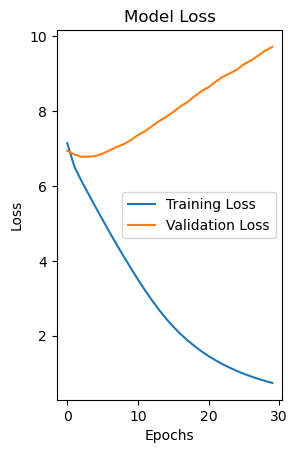

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


162/162 [==============================] - 1s 7ms/step - loss: 9.7187 - accuracy: 0.1238
Test Loss: 9.7187, Test Accuracy: 0.1238


In [ ]:
text = "The sun was shining"
import time
import numpy as np
for i in range(5):
    # Tokenize the input text
    token_text = tokenizer.texts_to_sequences([text])[0]
    # Pad the tokenized text
    padded_token_text = pad_sequences([token_text], maxlen=max_len, padding='pre')
    # Predict the next word index
    pos = np.argmax(model.predict(padded_token_text))

    # Retrieve the word corresponding to the predicted index
    for word, index in tokenizer.word_index.items():
        if index == pos:
            # Append the predicted word to the input text
            text = text + " " + word
            print(text)
            # Simulate typing effect with a delay of 1 second
            time.sleep(1)

1/1 [==============================] - 0s 37ms/step
The sun was shining brightly
1/1 [==============================] - 0s 21ms/step
The sun was shining brightly in
1/1 [==============================] - 0s 19ms/step
The sun was shining brightly in the
1/1 [==============================] - 0s 21ms/step
The sun was shining brightly in the clear
1/1 [==============================] - 0s 19ms/step
The sun was shining brightly in the clear blue
